In [1]:
import os
os.chdir('c:\\Users\\Artem\\Desktop\\neural networks\\HTRU2')
os.getcwd()

'c:\\Users\\Artem\\Desktop\\neural networks\\HTRU2'

In [2]:
os.listdir(path='.')

['column_names.csv',
 'HTRU_2.arff',
 'HTRU_2.csv',
 'Readme.txt',
 'пульсары нормализованные.csv',
 'пульсары.txt']

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('HTRU_2.csv', header=None)

In [5]:
data.shape

(17898, 9)

In [6]:
data.head(6)

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [7]:
x=data # x - такой же массив, как и data, только из него будем нарезать куски для теста виладции и тренировки


In [8]:

x_train=np.full((14318, 8), 0) #нарезаем кусок данных для тренировки
x_valid=np.full((1790, 8), 0) #нарезаем кусок данных для валидации
x_test=np.full((1790, 8), 0) #нарезаем кусок данных для теста
y_train=np.full((14318, 1), 0) #нарезаем кусок правильных ответов для тренировки
y_valid=np.full((1790, 1), 0) #нарезаем кусок правильных ответов для валидации
y_test=np.full((1790, 1), 0) #нарезаем кусок правильных ответов для теста


for j in range(14318): #заполняем кусок данных для тренировки
    for i in range(8):
        x_train[j][i] = x[i][j]
        
for j in range(1790): #заполняем кусок данных для валидации
    for i in range(8):
        x_valid[j][i] = x[i][j+14318]
        
for j in range(1790): #заполняем кусок данных для теста
    for i in range(8):
        x_test[j][i] = x[i][j+16108]
        
        
for k in range(14318): #заполняем кусок правильных ответов для тренировки
    y_train[k]=x[8][k]
    
for k in range(1790): #заполняем кусок правильных ответов для валидации
    y_valid[k]=x[8][k+14318]
    
for k in range(1790): #заполняем кусок правильных ответов для теста
    y_test[k]=x[8][k+16108]

In [9]:
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+2)
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1.2])

    plt.legend()


In [10]:
weight_for_0 = (1 / 16259)*(17898)/2.0 #замена значений весов
weight_for_1 = (1 / 1639)*(17898)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
model = tf.keras.models.Sequential([

tf.keras.layers.Dense(16, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(32, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
baseline_history1=model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), class_weight=class_weight)
model.evaluate(x_test, y_test, verbose=0)

Train on 14318 samples, validate on 1790 samples
Epoch 1/100
14318/14318 [==============================] - 1s 102us/sample - loss: 3.0729 - accuracy: 0.7074 - val_loss: 0.1613 - val_accuracy: 0.9514
Epoch 2/100
14318/14318 [==============================] - 1s 41us/sample - loss: 0.7257 - accuracy: 0.7001 - val_loss: 0.2100 - val_accuracy: 0.9324
Epoch 3/100
14318/14318 [==============================] - 1s 38us/sample - loss: 0.5081 - accuracy: 0.7236 - val_loss: 0.1937 - val_accuracy: 0.9492
Epoch 4/100
14318/14318 [==============================] - 1s 36us/sample - loss: 0.4710 - accuracy: 0.7507 - val_loss: 0.1683 - val_accuracy: 0.9704
Epoch 5/100
14318/14318 [==============================] - 1s 36us/sample - loss: 0.4429 - accuracy: 0.7823 - val_loss: 0.1767 - val_accuracy: 0.9603
Epoch 6/100
14318/14318 [==============================] - 1s 36us/sample - loss: 0.4229 - accuracy: 0.7932 - val_loss: 0.1988 - val_accuracy: 0.9698
Epoch 7/100
14318/14318 [=========================

[0.2846503842143373, 0.9670391]

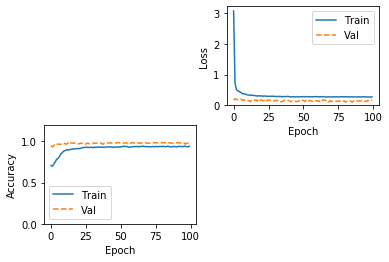

In [15]:
plot_metrics(baseline_history1)

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('не пульсар предсказанный как не пульсар : ', cm[0][0])
  print('не пульсар предсказанный как пульсар : ', cm[0][1])
  print('пульсар предсказанный как не пульсар : ', cm[1][0])
  print('Пульсар предсказанный как пульсар : ', cm[1][1])
  print('Всего пульсаров: ', cm[1][0]+cm[1][1])

loss :  0.2846503842143373
accuracy :  0.9670391

не пульсар предсказанный как не пульсар :  1708
не пульсар предсказанный как пульсар :  55
пульсар предсказанный как не пульсар :  4
Пульсар предсказанный как пульсар :  23
Всего пульсаров:  27


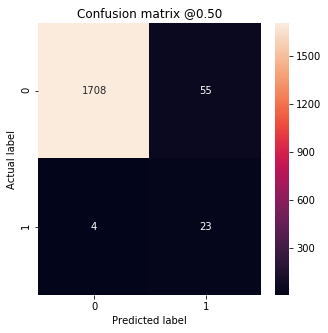

In [21]:
test_predictions_baseline = model.predict(x_test)

baseline_results = model.evaluate(x_test, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [23]:
# далее всё тоже самое, только с центрированными данными

In [28]:
datanorm = pd.read_csv('пульсары нормализованные.csv', header=None)

In [29]:
datanorm.shape

(17898, 9)

In [30]:
a=datanorm

In [31]:
a_train=np.full((14318, 8), 0)
a_valid=np.full((1790, 8), 0)
a_test=np.full((1790, 8), 0)
b_train=np.full((14318, 1), 0)
b_valid=np.full((1790, 1), 0)
b_test=np.full((1790, 1), 0)


for j in range(14318):
    for i in range(8):
        a_train[j][i] = a[i][j]
        
for j in range(1790):
    for i in range(8):
        a_valid[j][i] = a[i][j+14318]
        
for j in range(1790):
    for i in range(8):
        a_test[j][i] = a[i][j+16108]
        
        
for k in range(14318):
    b_train[k]=a[8][k]
    
for k in range(1790):
    b_valid[k]=a[8][k+14318]
    
for k in range(1790):
    b_test[k]=a[8][k+16108]

In [32]:
weight_for_0 = (1 / 16259)*(17898)/2.0 #замена значений весов
weight_for_1 = (1 / 1639)*(17898)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

In [33]:
#модель с центрированными данными
model = tf.keras.models.Sequential([

tf.keras.layers.Dense(16, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(32, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
baseline_history2=model.fit(a_train, b_train, epochs=100, validation_data=(a_valid, b_valid), shuffle=True, class_weight = class_weight)
model.evaluate(a_test, b_test, verbose=0)

Train on 14318 samples, validate on 1790 samples
Epoch 1/100
14318/14318 [==============================] - 1s 87us/sample - loss: 2.6529 - accuracy: 0.6173 - val_loss: 0.2407 - val_accuracy: 0.8341
Epoch 2/100
14318/14318 [==============================] - 1s 36us/sample - loss: 0.5955 - accuracy: 0.7215 - val_loss: 0.1799 - val_accuracy: 0.9408
Epoch 3/100
14318/14318 [==============================] - 1s 38us/sample - loss: 0.4829 - accuracy: 0.7649 - val_loss: 0.1915 - val_accuracy: 0.9391
Epoch 4/100
14318/14318 [==============================] - 1s 35us/sample - loss: 0.4439 - accuracy: 0.7901 - val_loss: 0.1718 - val_accuracy: 0.9620
Epoch 5/100
14318/14318 [==============================] - 1s 38us/sample - loss: 0.4304 - accuracy: 0.8209 - val_loss: 0.2352 - val_accuracy: 0.9380
Epoch 6/100
14318/14318 [==============================] - 1s 38us/sample - loss: 0.4001 - accuracy: 0.8550 - val_loss: 0.1967 - val_accuracy: 0.9765
Epoch 7/100
14318/14318 [==========================

[0.2334181695011075, 0.9815642]

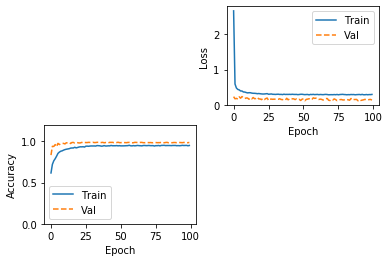

In [37]:
plot_metrics(baseline_history2)

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Правильно предсказанный не пульсар (True Negatives): ', cm[0][0])
  print('Неправильно предсказанный пульсар (False Positives): ', cm[0][1])
  print('Неправильно предсказанный не пульсар (False Negatives): ', cm[1][0])
  print('Правильно предсказанный пульсар (True Positives): ', cm[1][1])
  print('Всего пульсаров: ', cm[1][0]+cm[1][1])

loss :  0.2334181695011075
accuracy :  0.9815642

Правильно предсказанный не пульсар (True Negatives):  1738
Неправильно предсказанный пульсар (False Positives):  25
Неправильно предсказанный не пульсар (False Negatives):  8
Правильно предсказанный пульсар (True Positives):  19
Всего пульсаров:  27


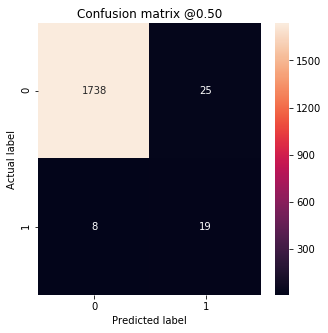

In [39]:
test_predictions_baseline = model.predict(a_test)
baseline_results = model.evaluate(a_test, b_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(b_test, test_predictions_baseline)